In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id = 54765
# And right click on the "Download Manually" link to get a new URL to the dataset

# Note: This is a very large dataset and will take time to download

!/miniconda3/envs/tensorflow/bin/wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = "/tmp/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()


--2019-09-14 22:00:51--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com... 23.52.161.19
Connecting to download.microsoft.com|23.52.161.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: '/tmp/cats-and-dogs.zip'

/tmp/cats-and-dogs. 100%[===================>] 786.68M  7.71MB/s    in 81s     

2019-09-14 22:02:12 (9.74 MB/s) - '/tmp/cats-and-dogs.zip' saved [824894548/824894548]



In [3]:
print(len(os.listdir("/tmp/PetImages/Cat/")))
print(len(os.listdir("/tmp/PetImages/Dog/")))

# Expected Output:
# 12501
# 12501

12501
12501


In [4]:
try:
    #YOUR CODE GOES HERE
    os.mkdir("/tmp/cats-v-dogs")
    os.mkdir("/tmp/cats-v-dogs/training")
    os.mkdir("/tmp/cats-v-dogs/testing")
    os.mkdir("/tmp/cats-v-dogs/training/cats")
    os.mkdir("/tmp/cats-v-dogs/training/dogs")
    os.mkdir("/tmp/cats-v-dogs/testing/cats")
    os.mkdir("/tmp/cats-v-dogs/testing/dogs")
except OSError:
    pass

In [5]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    # YOUR CODE STARTS HERE
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
    # YOUR CODE ENDS HERE
    

CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [6]:
print(len(os.listdir("/tmp/cats-v-dogs/training/cats/")))
print(len(os.listdir("/tmp/cats-v-dogs/training/dogs/")))
print(len(os.listdir("/tmp/cats-v-dogs/testing/cats/")))
print(len(os.listdir("/tmp/cats-v-dogs/testing/dogs/")))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [7]:
model = tf.keras.models.Sequential([
    # YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu", input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = RMSprop(lr = 0.001), loss = "binary_crossentropy", metrics = ["acc"])


In [8]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/" # YOUR CODE HERE
train_datagen = ImageDataGenerator(rescale = 1.0/255.) # YOUR CODE HERE
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 100,
                                                    class_mode = "binary",
                                                    target_size = (150, 150)) # YOUR CODE HERE

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/" # YOUR CODE HERE
validation_datagen = ImageDataGenerator(rescale = 1.0/255.) # YOUR CODE HERE
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size = 100,
                                                              class_mode = "binary",
                                                              target_size = (150, 150)) # YOUR CODE HERE

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [9]:
# Note that this may take some time.
history = model.fit_generator(train_generator,
                              epochs = 15,
                              verbose = 1,
                              validation_data = validation_generator)

Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
 49/225 [=====>........................] - ETA: 7:35 - loss: 1.2649 - acc: 0.5404

//miniconda3/envs/tensorflow/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:786: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
//miniconda3/envs/tensorflow/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:786: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
//miniconda3/envs/tensorflow/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:786: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
//miniconda3/envs/tensorflow/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:786: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
//miniconda3/envs/tensorflow/lib/python3.6/site-packages/PIL/TiffImageP

225/225 [==============================] - 642s 3s/step - loss: 0.7545 - acc: 0.6437 - val_loss: 0.5366 - val_acc: 0.7332
Epoch 2/15
225/225 [==============================] - 714s 3s/step - loss: 0.5155 - acc: 0.7447 - val_loss: 0.4775 - val_acc: 0.7644
Epoch 3/15
225/225 [==============================] - 692s 3s/step - loss: 0.4415 - acc: 0.7935 - val_loss: 0.4260 - val_acc: 0.8032
Epoch 4/15
225/225 [==============================] - 703s 3s/step - loss: 0.3839 - acc: 0.8256 - val_loss: 0.4280 - val_acc: 0.8036
Epoch 5/15
225/225 [==============================] - 686s 3s/step - loss: 0.3283 - acc: 0.8554 - val_loss: 0.3886 - val_acc: 0.8316
Epoch 6/15
225/225 [==============================] - 587s 3s/step - loss: 0.2663 - acc: 0.8866 - val_loss: 0.5658 - val_acc: 0.7992
Epoch 7/15
225/225 [==============================] - 558s 2s/step - loss: 0.2047 - acc: 0.9173 - val_loss: 0.4616 - val_acc: 0.8260
Epoch 8/15
225/225 [==============================] - 632s 3s/step - loss: 0.150

<Figure size 432x288 with 0 Axes>

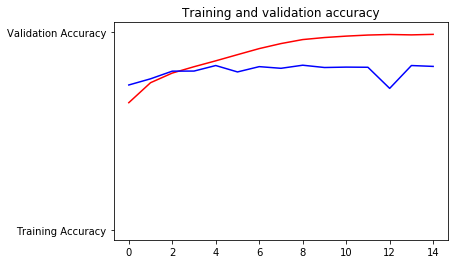

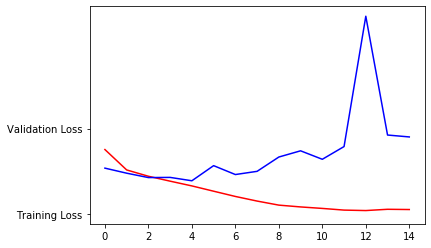

<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, "r", "Training Accuracy")
plt.plot(epochs, val_acc, "b", "Validation Accuracy")
plt.title("Training and validation accuracy")
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, "r", "Training Loss")
plt.plot(epochs, val_loss, "b", "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
# Here"s a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = "/content/" + fn
    img = image.load_img(path, target_size = (150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    print(classes[0])
    if classes[0] > 0.5:
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")